<a href="https://colab.research.google.com/github/dhanush46infotech-debug/SKIIRYT-AI-TRAINING-SESSION/blob/materials/regression_Housing_Data_ML_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [170]:
homedf = pd.read_csv('/content/housing.csv')

In [171]:
homedf.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [172]:
homedf.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [173]:
#list of variables to map
varhomedf = ['mainroad', 'guestroom', 'basement' ,'hotwaterheating','airconditioning','prefarea']
#to convert text into words
def binary_map(x):
    return x.map({'yes': 1,"no": 0})
    #apply that function to your dataframe
homedf[varhomedf] = homedf[varhomedf].apply(binary_map)


In [174]:
homedf.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [175]:

status = pd.get_dummies(homedf['furnishingstatus'])


In [176]:
status = status.astype('int')

In [177]:
homedf = pd.concat([homedf,status],axis=1)
homedf.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,1,0,0


In [178]:
homedf.drop(['furnishingstatus'], axis=1,inplace=True) ##drop that furnishing status column
homedf.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


PRE-PROCESSING


In [179]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler #to precprocess data in uniform scale(0 TO 1)


In [180]:
homedf_train, homedf_test = train_test_split(homedf, test_size=0.3, random_state=0)

In [181]:
scaler = MinMaxScaler()

In [182]:
#APPLY SCALAR TO ALL COLUMNS  FORMULA :{[x - XMin]/[xmax -xmin]}
#WHATEVER HAS NOT CHANGED INTO 0/1 CHANGE IT NOW USING THIS
#MIN SCALAR PREPROCESSOR

varhomedf2 = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
homedf_train[varhomedf2] = scaler.fit_transform(homedf_train[varhomedf2])


In [183]:
homedf_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
454,0.120606,0.193548,0.5,0.0,0.333333,1,0,0,0,1,0.0,0,0,0,1
392,0.151515,0.156495,0.5,0.0,0.333333,1,0,0,0,0,0.0,0,0,1,0
231,0.254545,0.180471,0.5,0.0,0.000000,1,0,0,0,0,0.0,1,0,1,0
271,0.224242,0.005013,1.0,0.0,0.333333,0,0,1,0,0,0.0,0,0,1,0
250,0.239394,0.121622,0.5,0.0,0.666667,1,0,0,0,0,0.0,0,0,1,0


In [184]:
homedf_train.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
70,0.436364,0.157222,0.50,0.5,0.333333,1,0,1,0,1,0.000000,1,0,1,0
277,0.221212,0.619297,0.25,0.0,0.000000,1,0,0,0,0,0.333333,1,0,1,0
9,0.696970,0.284365,0.50,0.5,1.000000,1,1,0,0,1,0.333333,1,0,0,1
359,0.169697,0.128160,0.50,0.0,0.000000,1,0,0,0,0,0.333333,0,0,0,1
192,0.284848,0.346120,0.50,0.0,0.000000,1,1,1,0,0,0.000000,1,1,0,0


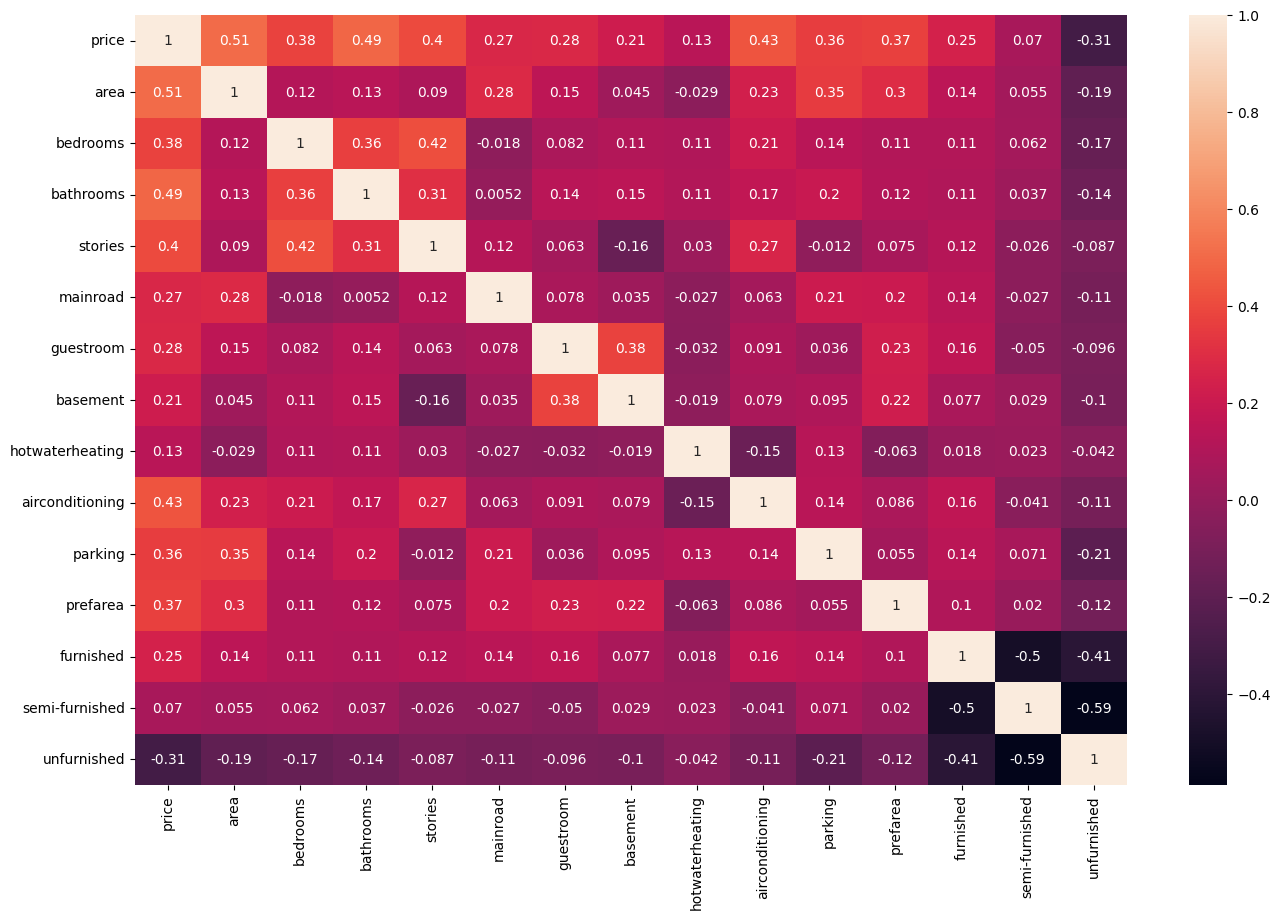

In [185]:
#concept x->x --> multicolinearity(should not occurs here ) & x->y --> correlated
#since it is an regression, use the heatmap

plt.figure(figsize=(16,10)) #(width,height)
#we have to implement using seaborn to get heat map
sns.heatmap(homedf_train.corr(), annot=True) #if annot =false (value will not occur)
plt.show()

in this heatmap area & price are highly corelated

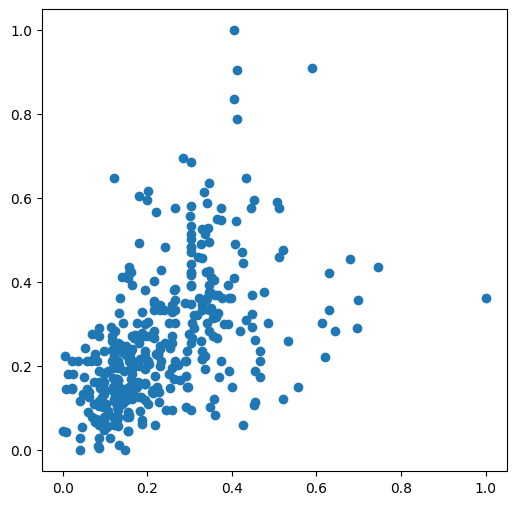

In [186]:
#to visualize this using scatter plot
plt.figure(figsize=(6,6))
plt.scatter(homedf_train['area'], homedf_train['price'])
plt.show()

split the  X & Y for model building

In [187]:
y_train = homedf_train.pop('price')
x_train = homedf_train

**TO finding regression of

decision tree
kneighbors
linear regression
randomforest**

In [188]:
#fit the model

from sklearn.tree import DecisionTreeRegressor

modeldf= DecisionTreeRegressor()
modeldf.fit(homedf_train,y_train)

DecisionTreeRegressor()

In [189]:
## predict
y_preddf=modeldf.predict(homedf_train)

In [190]:
from sklearn.metrics import r2_score
r2_score(y_train,y_preddf)

0.999301351739052

In [191]:
from sklearn.linear_model import LinearRegression
model2=LinearRegression()
model2.fit(homedf_train,y_train)

LinearRegression()

In [192]:
from sklearn.metrics import r2_score
y_pred2=model2.predict(homedf_train)
r2_score(y_train,y_pred2)

0.6592098113187075

In [193]:
from sklearn.neighbors import KNeighborsRegressor
model3=KNeighborsRegressor()
model3.fit(homedf_train,y_train)

KNeighborsRegressor()

In [194]:
from sklearn.metrics import r2_score
y_pred3=model3.predict(homedf_train)
r2_score(y_train,y_pred3)

0.6545924887130801

In [195]:
from sklearn.ensemble import RandomForestRegressor
model4=RandomForestRegressor()
model4.fit(homedf_train,y_train)

RandomForestRegressor()

In [196]:
from sklearn.metrics import r2_score
y_pred4=model4.predict(homedf_train)
r2_score(y_train,y_pred4)

0.9420195996972223